<a href="https://colab.research.google.com/github/Nani-codes/AI_Project/blob/main/Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
stock = yf.Ticker("LTIM.NS")
print(stock)
stock.history(period='5d')

yfinance.Ticker object <LTIM.NS>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-30 00:00:00+05:30,5171.000000,5177.799805,5083.049805,5149.200195,276530,0.0,0.0
2023-10-31 00:00:00+05:30,5164.000000,5164.000000,5051.100098,5060.399902,259121,0.0,0.0
2023-11-01 00:00:00+05:30,5065.000000,5106.000000,4989.049805,4998.700195,323448,0.0,0.0
2023-11-02 00:00:00+05:30,5065.700195,5122.350098,5006.149902,5020.049805,312381,0.0,0.0
2023-11-03 00:00:00+05:30,5078.000000,5148.000000,5059.000000,5134.950195,324788,0.0,0.0


In [27]:
df=stock.history(start='2000-11-01', end='2023-11-01', actions=False)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-21 00:00:00+05:30,596.011502,634.435032,595.117931,623.354736,11824029
2016-07-22 00:00:00+05:30,625.499329,633.273403,622.103772,625.499329,820402
2016-07-25 00:00:00+05:30,626.393021,626.393021,618.350885,619.289124,260240
2016-07-26 00:00:00+05:30,620.942244,626.839788,616.563726,618.484924,312995
2016-07-27 00:00:00+05:30,618.440116,623.399476,613.927596,616.474304,168708


In [8]:
df.shape

(1799, 5)

In [9]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [28]:
df=df.drop(['Open','High','Volume','Low'],axis=1)

In [29]:
df.head()

,Close
Date,
2016-07-21 00:00:00+05:30,623.354736
2016-07-22 00:00:00+05:30,625.499329
2016-07-25 00:00:00+05:30,619.289124
2016-07-26 00:00:00+05:30,618.484924
2016-07-27 00:00:00+05:30,616.474304


Text(0.5, 0, 'Time')

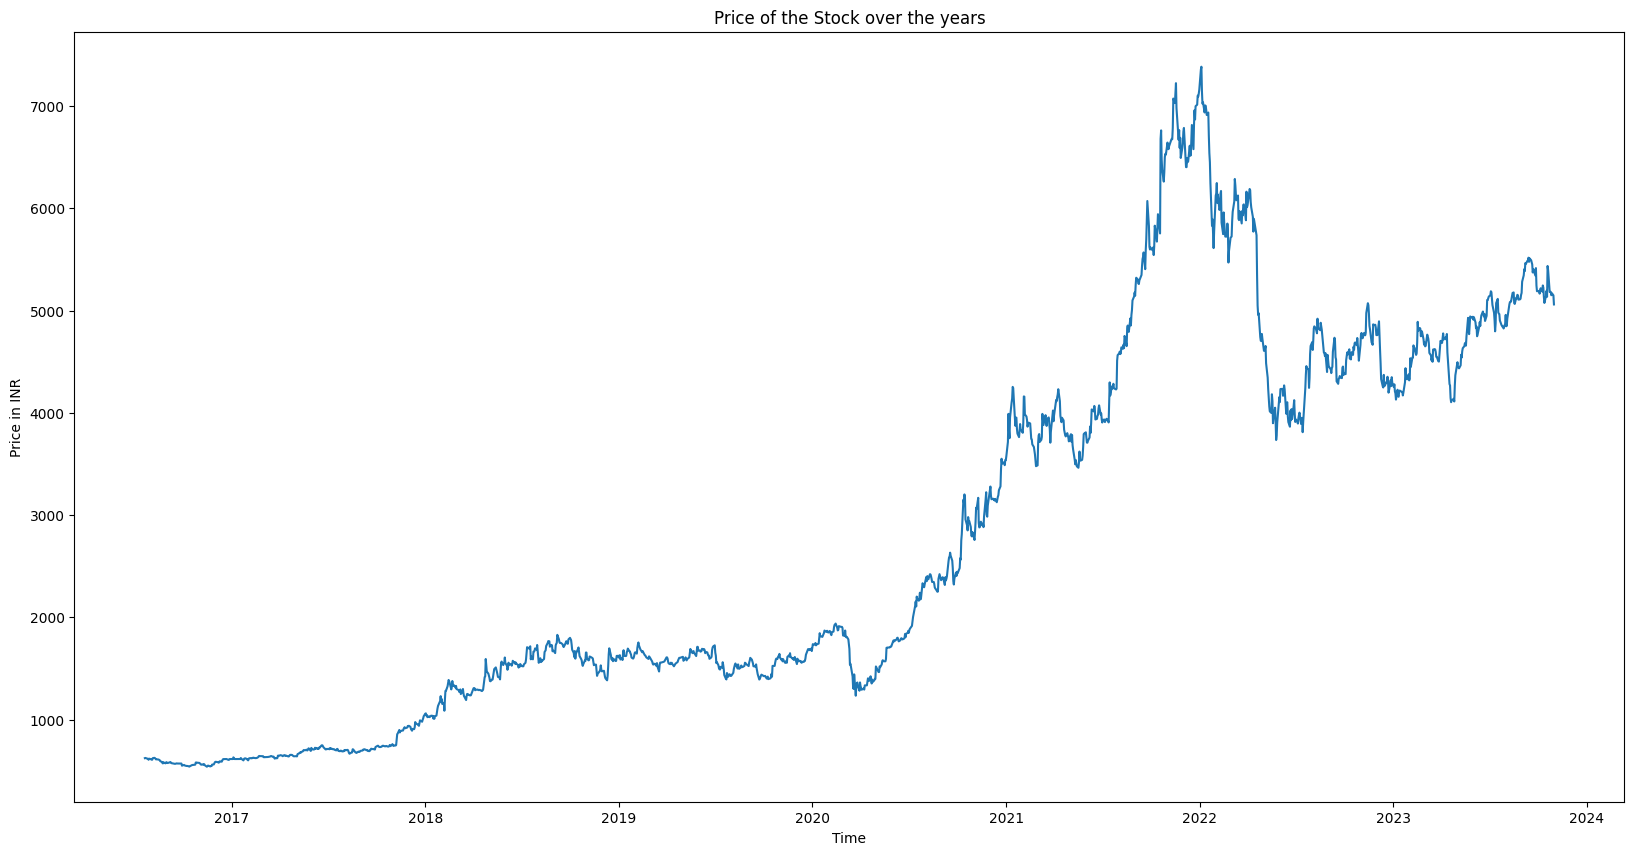

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Price of the Stock over the years")
plt.plot(df['2001-11-01':'2023-11-01'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

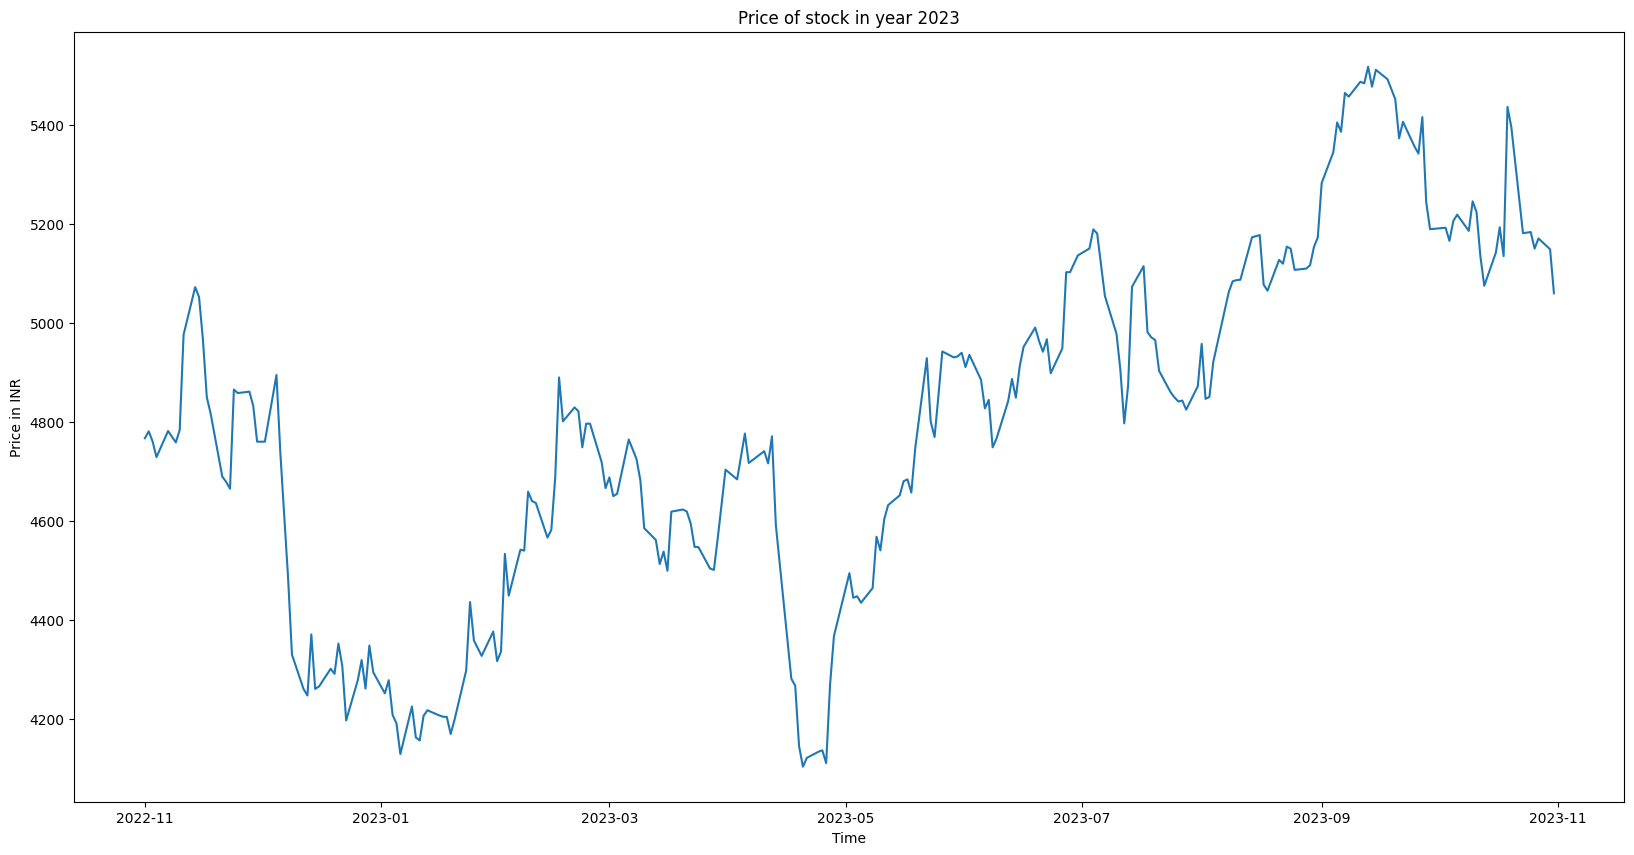

In [34]:
plt.figure(figsize=(20,10))
plt.title("Price of stock in year 2023")
plt.plot(df['2022-11-01':'2023-11-01'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [35]:
data=df.values

In [36]:
data

array([[ 623.35473633],
       [ 625.49932861],
       [ 619.28912354],
       ...,
       [5171.        ],
       [5149.20019531],
       [5060.39990234]])

In [37]:
len(data)

1799

In [38]:
import math

In [39]:
train_len=math.ceil(len(data)*0.92)

In [40]:
train_len

1656

In [41]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))

In [43]:
scaled_data=min_max_scalar.fit_transform(data)

In [44]:
len(scaled_data)

1799

In [45]:
scaled_data

array([[0.0122628 ],
       [0.01257606],
       [0.01166893],
       ...,
       [0.67654299],
       [0.67335867],
       [0.6603875 ]])

In [46]:
train_data=scaled_data[0:train_len,:]

In [47]:
len(train_data)

1656

In [48]:
interval=60

In [49]:
x_train=[]
y_train=[]

for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [50]:
x_train

[array([0.0122628 , 0.01257606, 0.01166893, 0.01155146, 0.01125777,
        0.0099525 , 0.01150576, 0.01086618, 0.01044196, 0.00996556,
        0.0101026 , 0.01226932, 0.01269355, 0.01235417, 0.01130346,
        0.01049419, 0.01064429, 0.01022009, 0.0098285 , 0.00930642,
        0.00795547, 0.00683949, 0.00552121, 0.00472498, 0.00655887,
        0.00576266, 0.00486204, 0.00627822, 0.00642835, 0.00547551,
        0.00526016, 0.00625213, 0.00672855, 0.00608899, 0.00514265,
        0.00471195, 0.00434648, 0.00417678, 0.00409194, 0.00478371,
        0.00461404, 0.00465971, 0.00454879, 0.00455531, 0.0045096 ,
        0.00445088, 0.0045292 , 0.00143576, 0.00186647, 0.00251259,
        0.00190565, 0.00155323, 0.00144879, 0.00113555, 0.00099849,
        0.00018271, 0.00070482, 0.00197744, 0.00234945, 0.00243426]),
 array([0.01257606, 0.01166893, 0.01155146, 0.01125777, 0.0099525 ,
        0.01150576, 0.01086618, 0.01044196, 0.00996556, 0.0101026 ,
        0.01226932, 0.01269355, 0.01235417, 0.

In [51]:
y_train

[0.0026822670706187907,
 0.002603935653549244,
 0.002975943018521207,
 0.005951921698966883,
 0.006082435426997962,
 0.005664771883240077,
 0.005743085469347389,
 0.005410234897429075,
 0.004490023514224811,
 0.0037460533616864577,
 0.002910681696765116,
 0.0031129917942090135,
 0.0036089778395553274,
 0.0031456402860492866,
 0.0036089778395553274,
 0.0021536503643944244,
 0.0,
 0.0009136585045853018,
 0.0015934906859879638,
 0.0014746473227354034,
 0.00047804809734450227,
 0.0005638685185499759,
 0.0010984764280830978,
 0.0010984764280830978,
 0.0030653652940968446,
 0.003236961559102247,
 0.004623033576967875,
 0.0061938878564068295,
 0.007012311191730042,
 0.007012311191730042,
 0.006649290631721205,
 0.006484291822740337,
 0.00578467618874523,
 0.006108076350682459,
 0.007652540806023317,
 0.007461161088425469,
 0.007177318916192027,
 0.008933008950091012,
 0.010325669508500043,
 0.010866901620501024,
 0.010979102950323491,
 0.011012081314964992,
 0.01105168388207435,
 0.0109857004

In [52]:
import numpy as np

In [53]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [54]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [55]:
x_train.shape

(1596, 60, 1)

In [56]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [57]:
model=Sequential()
# model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(75,return_sequences=True))
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
# model.add(drop)
# model.add(Dense(25))
model.add(Dense(1))

In [58]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [59]:
history=model.fit(x_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
25/25 [==============================] - 6s 60ms/step - loss: 0.0298
Epoch 2/100
25/25 [==============================] - 2s 61ms/step - loss: 0.0014
Epoch 3/100
25/25 [==============================] - 2s 71ms/step - loss: 6.9103e-04
Epoch 4/100
25/25 [==============================] - 2s 92ms/step - loss: 6.2054e-04
Epoch 5/100
25/25 [==============================] - 1s 59ms/step - loss: 5.8918e-04
Epoch 6/100
25/25 [==============================] - 2s 60ms/step - loss: 5.9357e-04
Epoch 7/100
25/25 [==============================] - 1s 60ms/step - loss: 5.5634e-04
Epoch 8/100
25/25 [==============================] - 2s 61ms/step - loss: 5.3514e-04
Epoch 9/100
25/25 [==============================] - 2s 61ms/step - loss: 5.2204e-04
Epoch 10/100
25/25 [==============================] - 2s 60ms/step - loss: 5.2912e-04
Epoch 11/100
25/25 [==============================] - 2s 85ms/step - loss: 4.9786e-04
Epoch 12/100
25/25 [==============================] - 2s 80ms/step - lo

In [60]:
test_data=scaled_data[train_len-interval:,:]

In [61]:
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [62]:
y_test

array([[4684.58984375],
       [4777.09863281],
       [4717.60009766],
       [4741.46875   ],
       [4716.76025391],
       [4771.41552734],
       [4592.22900391],
       [4282.08789062],
       [4268.25097656],
       [4145.64648438],
       [4104.43359375],
       [4122.22363281],
       [4134.67626953],
       [4137.59179688],
       [4111.64794922],
       [4269.78222656],
       [4367.92529297],
       [4495.22314453],
       [4445.55908203],
       [4448.57324219],
       [4435.52783203],
       [4465.12841797],
       [4568.75585938],
       [4541.13183594],
       [4603.89160156],
       [4632.55371094],
       [4652.27099609],
       [4680.83398438],
       [4684.63867188],
       [4657.85498047],
       [4747.00292969],
       [4929.30322266],
       [4801.21386719],
       [4770.08105469],
       [4853.29931641],
       [4942.79394531],
       [4930.73583984],
       [4933.05859375],
       [4940.125     ],
       [4911.36425781],
       [4935.92480469],
       [4885.569

In [63]:
x_test

[array([0.53603237, 0.53348133, 0.52448447, 0.53851872, 0.52937094,
        0.52849423, 0.53577354, 0.53739765, 0.53589579, 0.53550058,
        0.53542869, 0.5303985 , 0.53460946, 0.5490964 , 0.56930331,
        0.55797822, 0.55343667, 0.56060101, 0.55188845, 0.55471088,
        0.58353398, 0.57118333, 0.58473222, 0.58447239, 0.60186157,
        0.59911133, 0.59852668, 0.58833422, 0.59059362, 0.60592554,
        0.63554269, 0.62259278, 0.62671458, 0.62556677, 0.6149413 ,
        0.62191427, 0.62190707, 0.61056693, 0.60292266, 0.60606262,
        0.60054051, 0.60123357, 0.61723678, 0.61149814, 0.60522535,
        0.59109174, 0.58761242, 0.58053118, 0.5841908 , 0.57852434,
        0.59597857, 0.5965993 , 0.59600018, 0.59248484, 0.58557677,
        0.58551187, 0.57919571, 0.57879152, 0.58826932, 0.6083509 ]),
 array([0.53348133, 0.52448447, 0.53851872, 0.52937094, 0.52849423,
        0.53577354, 0.53739765, 0.53589579, 0.53550058, 0.53542869,
        0.5303985 , 0.53460946, 0.5490964 , 0.

In [64]:
len(y_test)

143

In [65]:
len(x_test)

143

In [66]:
x_test=np.array(x_test)

In [67]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [68]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)

5/5 [==============================] - 1s 14ms/step


In [69]:
predictions[0:5]

array([[4652.818 ],
       [4709.1904],
       [4778.514 ],
       [4791.488 ],
       [4795.3745]], dtype=float32)

In [70]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

38.91000600961539

In [71]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

<ipython-input-71-373018d9c8b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


In [72]:
train_data.head()

,Close
Date,
2016-07-21 00:00:00+05:30,623.354736
2016-07-22 00:00:00+05:30,625.499329
2016-07-25 00:00:00+05:30,619.289124
2016-07-26 00:00:00+05:30,618.484924
2016-07-27 00:00:00+05:30,616.474304


In [73]:
valid_data.head()

,Close,predictions
Date,,
2023-04-03 00:00:00+05:30,4684.589844,4652.817871
2023-04-05 00:00:00+05:30,4777.098633,4709.190430
2023-04-06 00:00:00+05:30,4717.600098,4778.514160
2023-04-10 00:00:00+05:30,4741.468750,4791.487793
2023-04-11 00:00:00+05:30,4716.760254,4795.374512


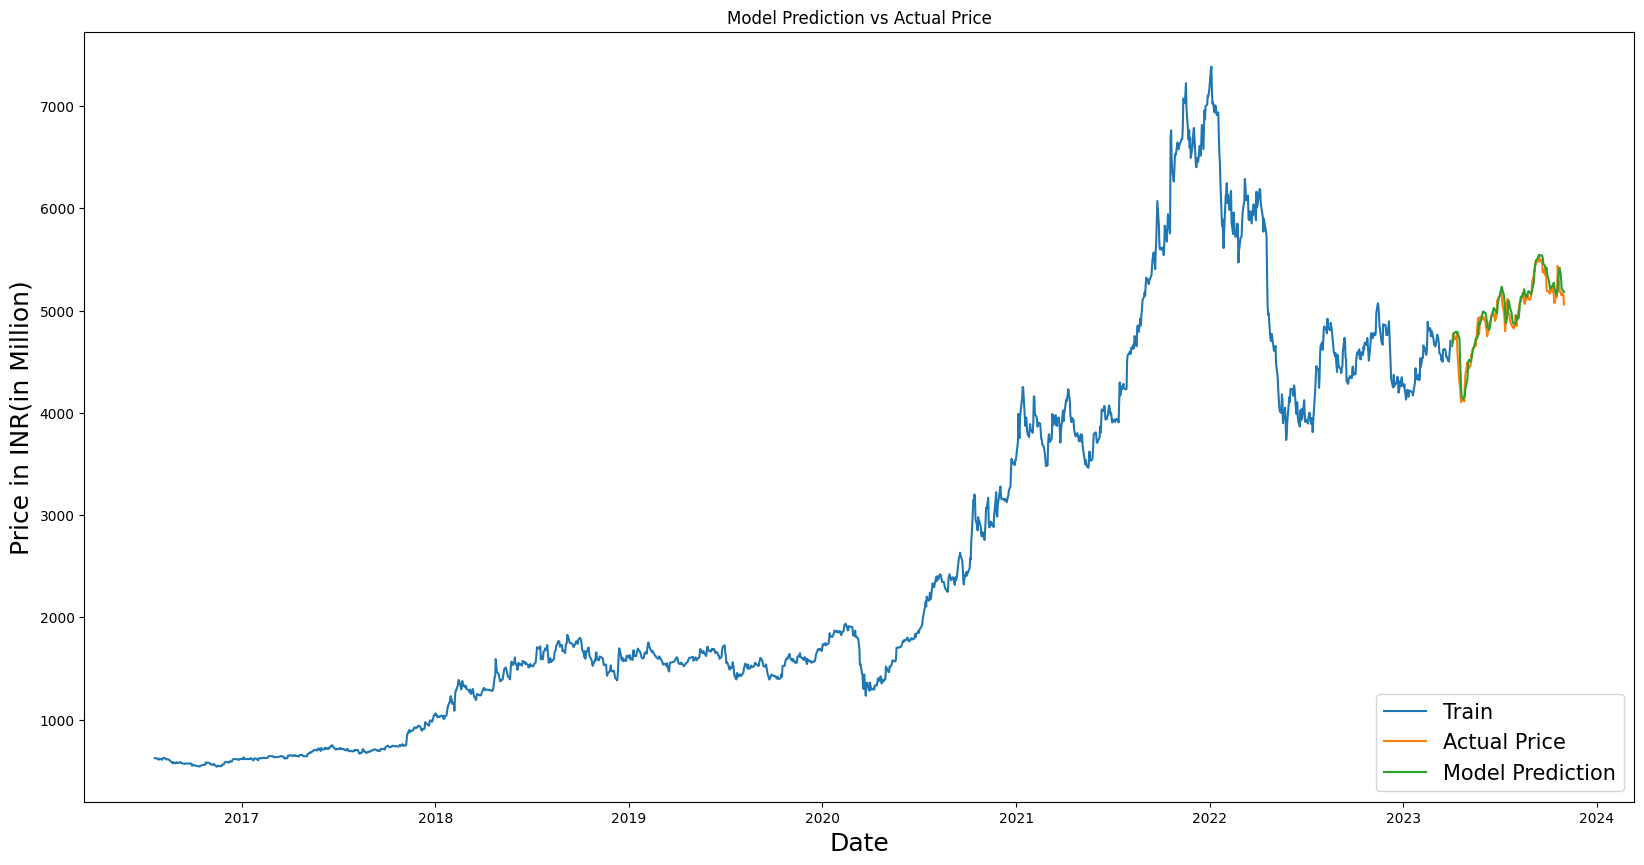

In [75]:
plt.figure(figsize=(20,10))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

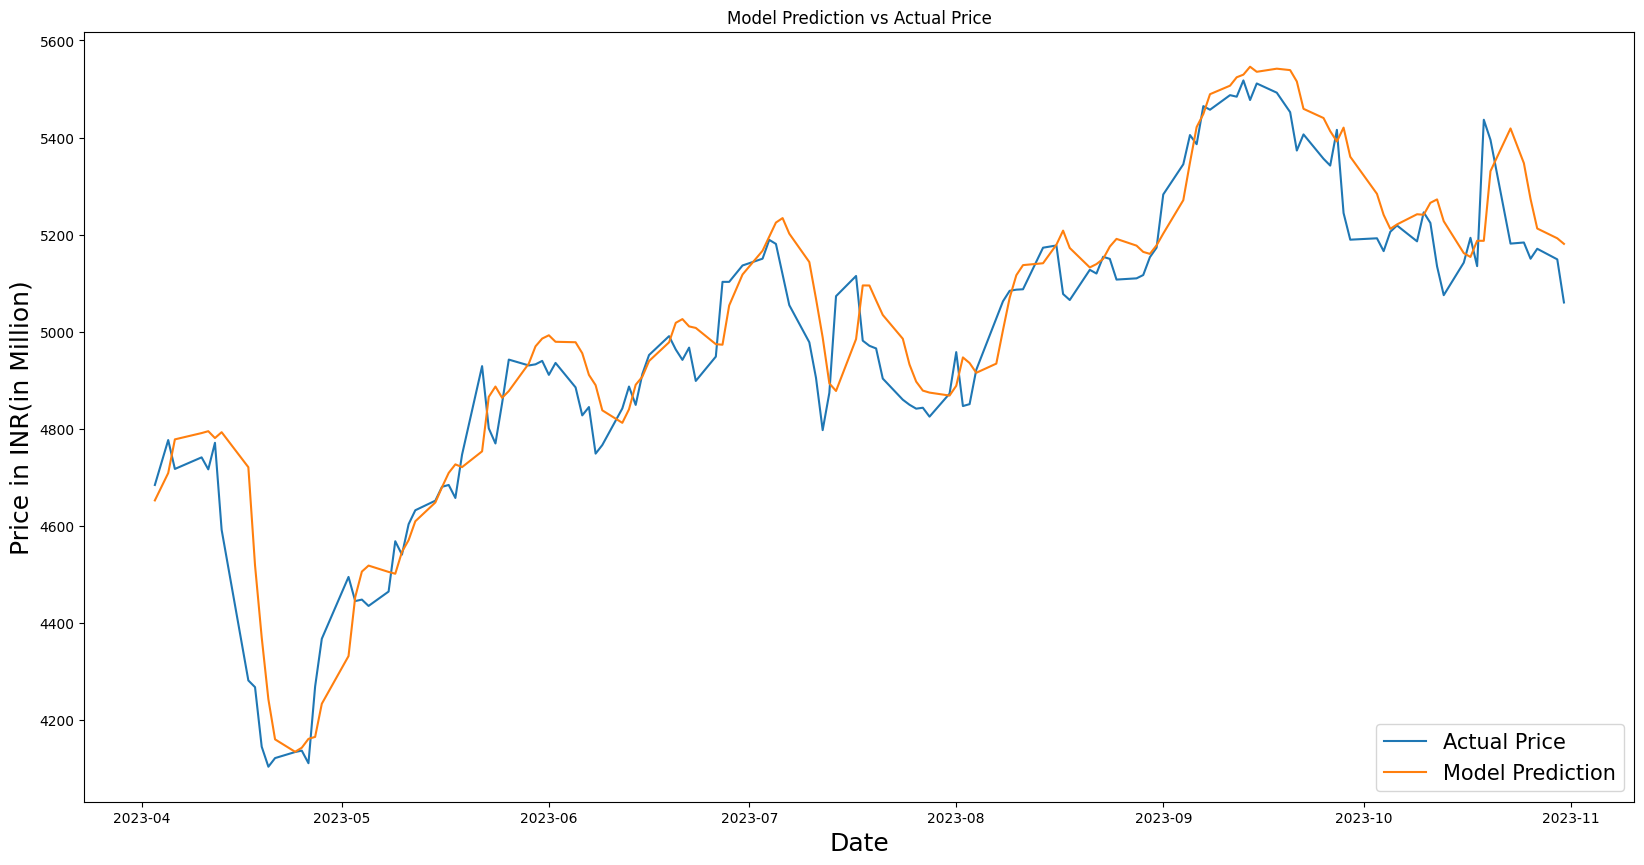

In [77]:
plt.figure(figsize=(20,10))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [78]:
valid_data

,Close,predictions
Date,,
2023-04-03 00:00:00+05:30,4684.589844,4652.817871
2023-04-05 00:00:00+05:30,4777.098633,4709.190430
2023-04-06 00:00:00+05:30,4717.600098,4778.514160
2023-04-10 00:00:00+05:30,4741.468750,4791.487793
2023-04-11 00:00:00+05:30,4716.760254,4795.374512
...,...,...
2023-10-25 00:00:00+05:30,5183.919922,5347.234863
2023-10-26 00:00:00+05:30,5150.500000,5273.434570
2023-10-27 00:00:00+05:30,5171.000000,5212.732910


In [85]:
close = valid_data['Close']
prediction = valid_data['predictions']
count = 0
for i in range(len(valid_data)):
  allowed_error = close[i]*0.005
  difference = abs(prediction[i]-close[i])
  if difference < allowed_error:
    count=count+1
Accuracy = (count/len(valid_data))*100
print("Accuarcy: ",Accuracy)

Accuarcy:  25.174825174825177


In [86]:
df_test=stock.history(start='2000-11-01', end='2023-11-01', actions=False)

In [87]:
df_test.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-21 00:00:00+05:30,596.011502,634.435032,595.117931,623.354736,11824029


In [88]:
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)

In [89]:
test_value=df_test[-60:].values

In [90]:
test_value

array([[4851.0625    ],
       [4921.78808594],
       [5027.52734375],
       [5062.89013672],
       [5084.45654297],
       [5086.79736328],
       [5087.59423828],
       [5173.21142578],
       [5177.79394531],
       [5077.83203125],
       [5065.47998047],
       [5127.63867188],
       [5120.01806641],
       [5154.484375  ],
       [5150.15136719],
       [5107.56640625],
       [5110.10693359],
       [5116.88037109],
       [5153.63769531],
       [5173.31152344],
       [5282.83642578],
       [5344.9453125 ],
       [5405.16113281],
       [5386.33398438],
       [5464.6796875 ],
       [5457.30859375],
       [5487.34179688],
       [5484.15478516],
       [5517.67431641],
       [5477.33105469],
       [5511.3984375 ],
       [5492.42236328],
       [5452.27832031],
       [5373.28466797],
       [5406.50585938],
       [5356.30078125],
       [5342.30517578],
       [5415.86962891],
       [5244.53466797],
       [5189.69775391],
       [5192.58642578],
       [5166.139

In [91]:
test_value=min_max_scalar.transform(test_value)

In [92]:
test=[]
test.append(test_value)

In [93]:
test

[array([[0.62980932],
        [0.6401403 ],
        [0.65558576],
        [0.66075125],
        [0.66390148],
        [0.66424341],
        [0.66435981],
        [0.67686602],
        [0.67753539],
        [0.66293383],
        [0.66112955],
        [0.67020915],
        [0.669096  ],
        [0.67413054],
        [0.67349761],
        [0.66727717],
        [0.66764827],
        [0.66863767],
        [0.67400686],
        [0.67688064],
        [0.69287908],
        [0.7019514 ],
        [0.7107472 ],
        [0.7079971 ],
        [0.71944115],
        [0.71836445],
        [0.72275143],
        [0.7222859 ],
        [0.72718214],
        [0.72128915],
        [0.72626542],
        [0.72349356],
        [0.71762967],
        [0.70609097],
        [0.71094363],
        [0.70361011],
        [0.70156575],
        [0.7123114 ],
        [0.68728429],
        [0.6792742 ],
        [0.67969615],
        [0.67583304],
        [0.68166048],
        [0.68354486],
        [0.67877949],
        [0

In [94]:
test=np.array(test)

In [95]:
test

array([[[0.62980932],
        [0.6401403 ],
        [0.65558576],
        [0.66075125],
        [0.66390148],
        [0.66424341],
        [0.66435981],
        [0.67686602],
        [0.67753539],
        [0.66293383],
        [0.66112955],
        [0.67020915],
        [0.669096  ],
        [0.67413054],
        [0.67349761],
        [0.66727717],
        [0.66764827],
        [0.66863767],
        [0.67400686],
        [0.67688064],
        [0.69287908],
        [0.7019514 ],
        [0.7107472 ],
        [0.7079971 ],
        [0.71944115],
        [0.71836445],
        [0.72275143],
        [0.7222859 ],
        [0.72718214],
        [0.72128915],
        [0.72626542],
        [0.72349356],
        [0.71762967],
        [0.70609097],
        [0.71094363],
        [0.70361011],
        [0.70156575],
        [0.7123114 ],
        [0.68728429],
        [0.6792742 ],
        [0.67969615],
        [0.67583304],
        [0.68166048],
        [0.68354486],
        [0.67877949],
        [0

In [96]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))

In [97]:
tomorrow_prediction=model.predict(test)

1/1 [==============================] - 0s 31ms/step


In [98]:
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)

In [99]:
tomorrow_prediction

array([[5135.659]], dtype=float32)

In [ ]:
model.save("Stock_price_prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
